<a href="https://colab.research.google.com/github/mahadrafan/Class-pH-Prediction-Based-On-Soil-Components/blob/main/athlete_injury_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## analyzing and predicting athlete injury risk

In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
raw_data = pd.read_csv("C:/Users/user/Downloads/collegiate_athlete_injury_dataset.csv")
raw_data.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [ ]:
raw_data.isnull().sum()

Athlete_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
dtype: int64

## Data preprocessing

In [ ]:
#because no missing data, we dont need to deal with it
data = raw_data.copy()

In [ ]:
#dropping the athlete_id
data = data.drop(columns=['Athlete_ID'])
data.head()

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [ ]:
#doing one-hot encode for the categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Position'], drop_first=True)

data.head()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Gender_Male,Position_Forward,Position_Guard
0,24,195,99,2,13,2,3,1,1,99,58,100,4,0,False,False,False
1,21,192,65,8,14,1,3,1,4,55,63,83,73,0,True,True,False
2,22,163,83,8,8,2,1,3,6,58,62,100,62,0,True,False,True
3,24,192,90,1,13,1,1,1,7,82,74,78,51,0,False,False,True
4,20,173,79,3,9,1,2,1,2,90,51,83,49,0,False,False,False


In [ ]:
data.head()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Gender_Male,Position_Forward,Position_Guard
0,24,195,99,2,13,2,3,1,1,99,58,100,4,0,False,False,False
1,21,192,65,8,14,1,3,1,4,55,63,83,73,0,True,True,False
2,22,163,83,8,8,2,1,3,6,58,62,100,62,0,True,False,True
3,24,192,90,1,13,1,1,1,7,82,74,78,51,0,False,False,True
4,20,173,79,3,9,1,2,1,2,90,51,83,49,0,False,False,False


## EDA

Injury_Indicator Value Counts:
Injury_Indicator
0    186
1     14
Name: count, dtype: int64




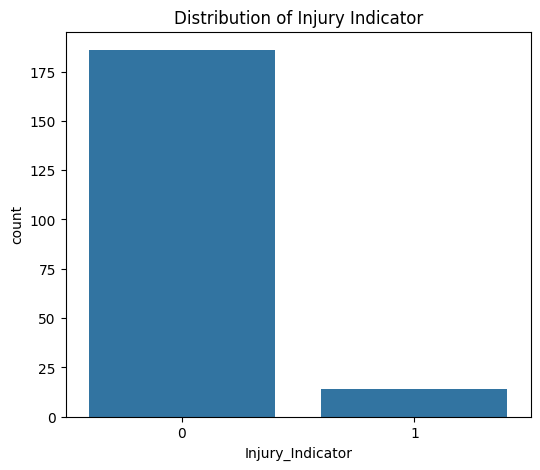

In [ ]:
#Checking for class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

#checking the distribution of the target variable
print("Injury_Indicator Value Counts:")
print(data['Injury_Indicator'].value_counts())
print("\n")

plt.figure(figsize=(6, 5))
sns.countplot(x='Injury_Indicator', data=data)
plt.title('Distribution of Injury Indicator')
plt.show()

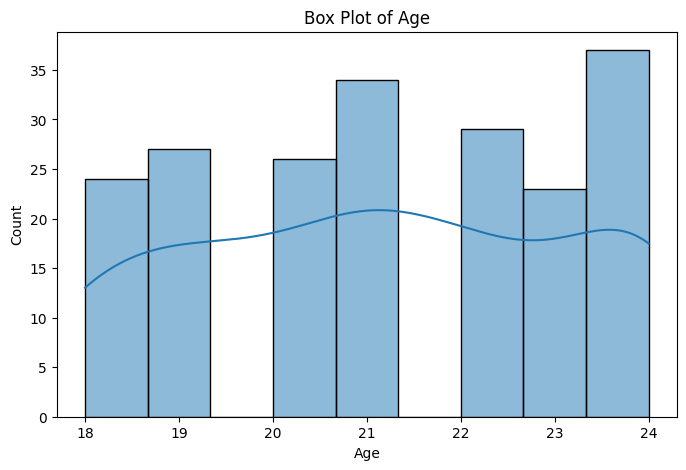

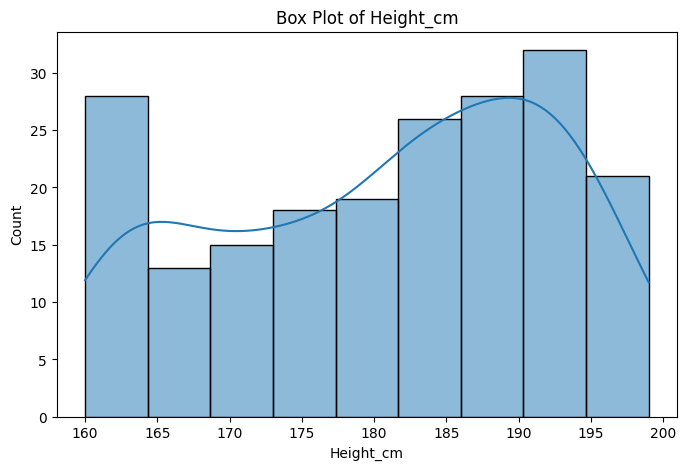

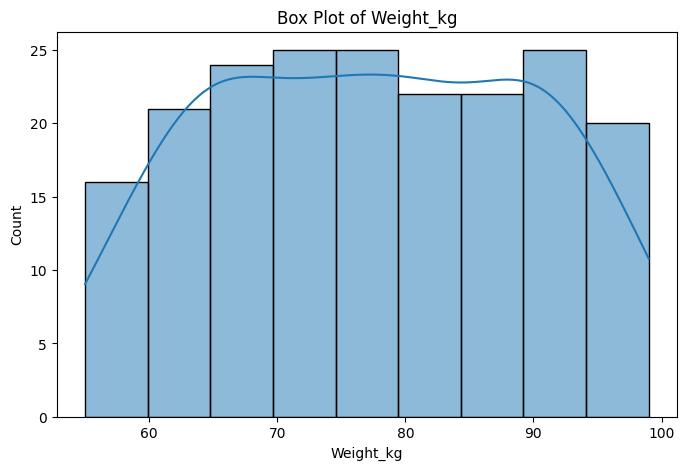

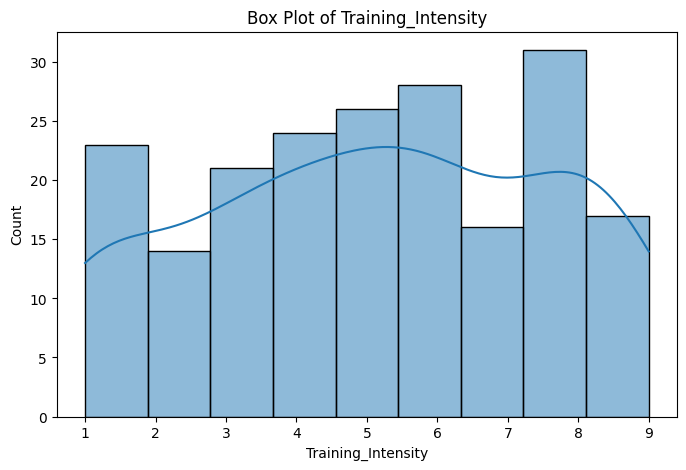

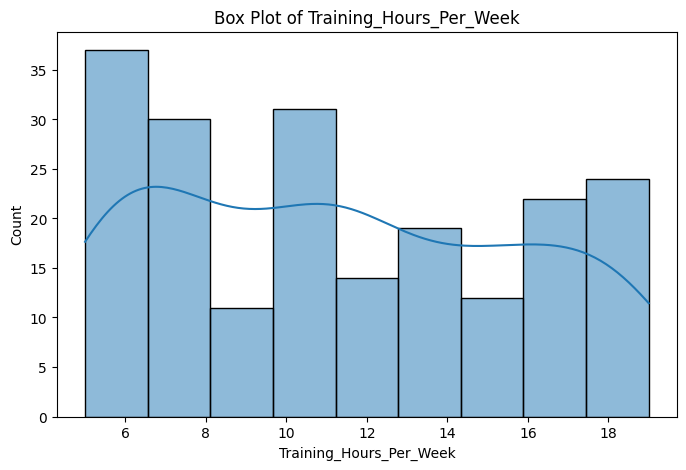

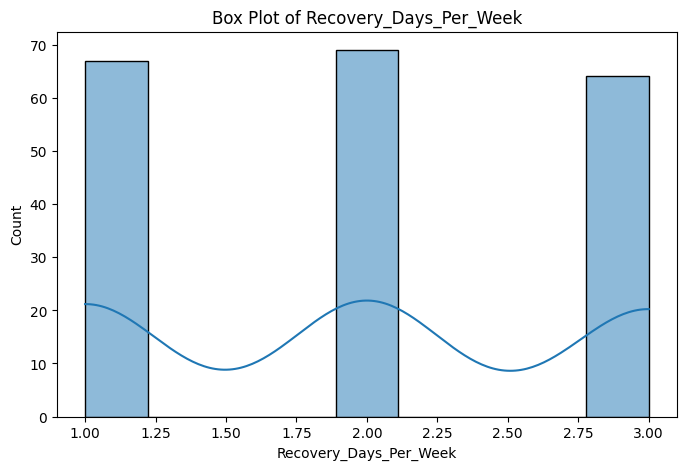

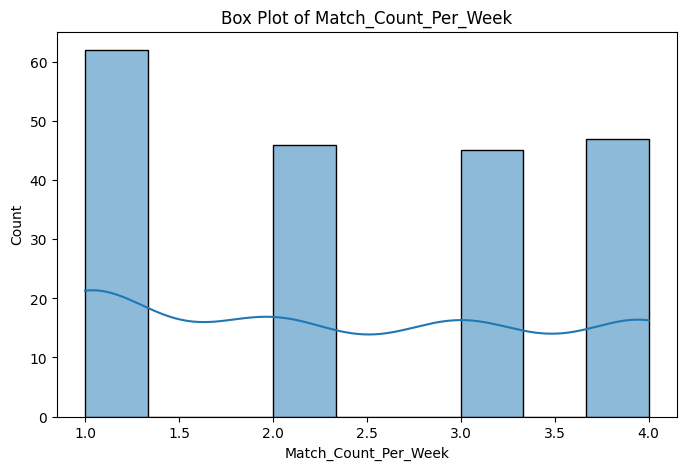

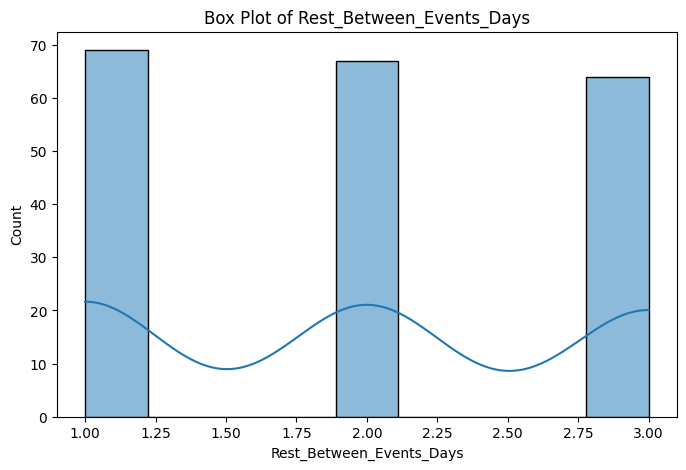

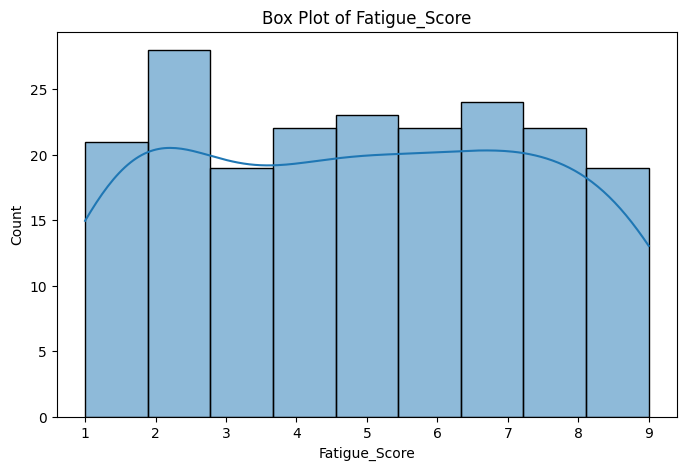

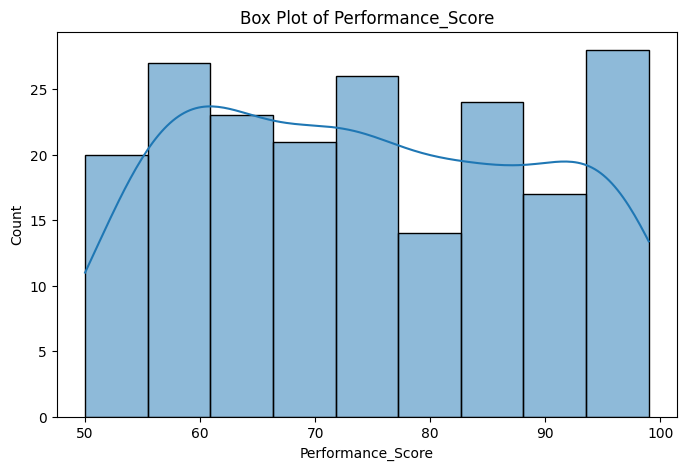

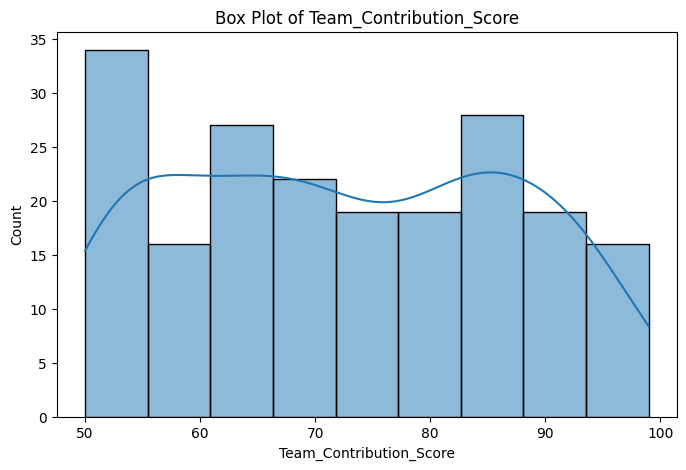

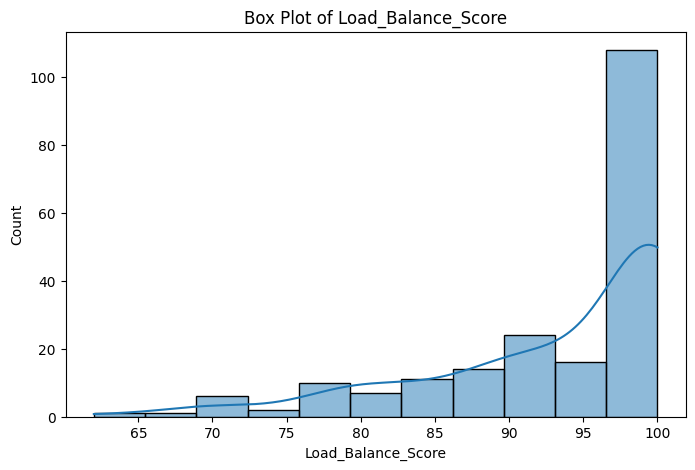

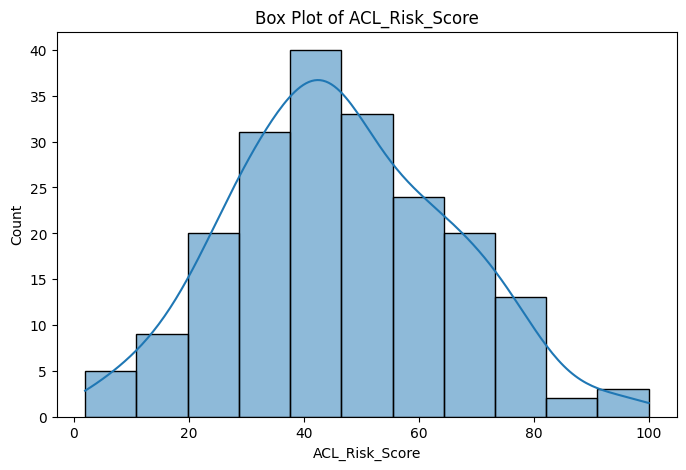

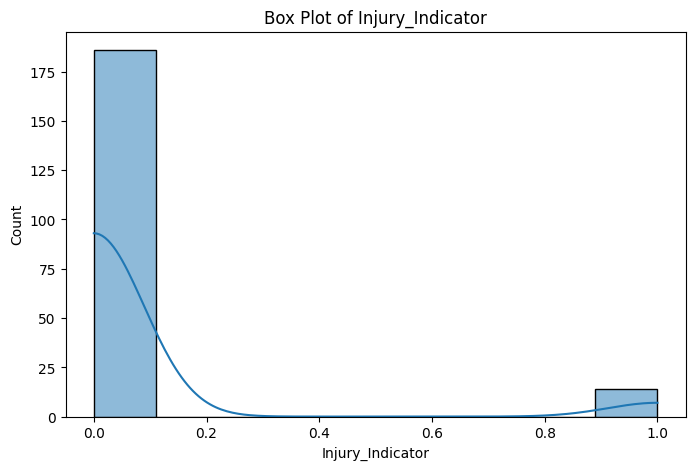

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns

for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(data[col] , kde=True)
  plt.title(f'Box Plot of {col}')
  plt.show()

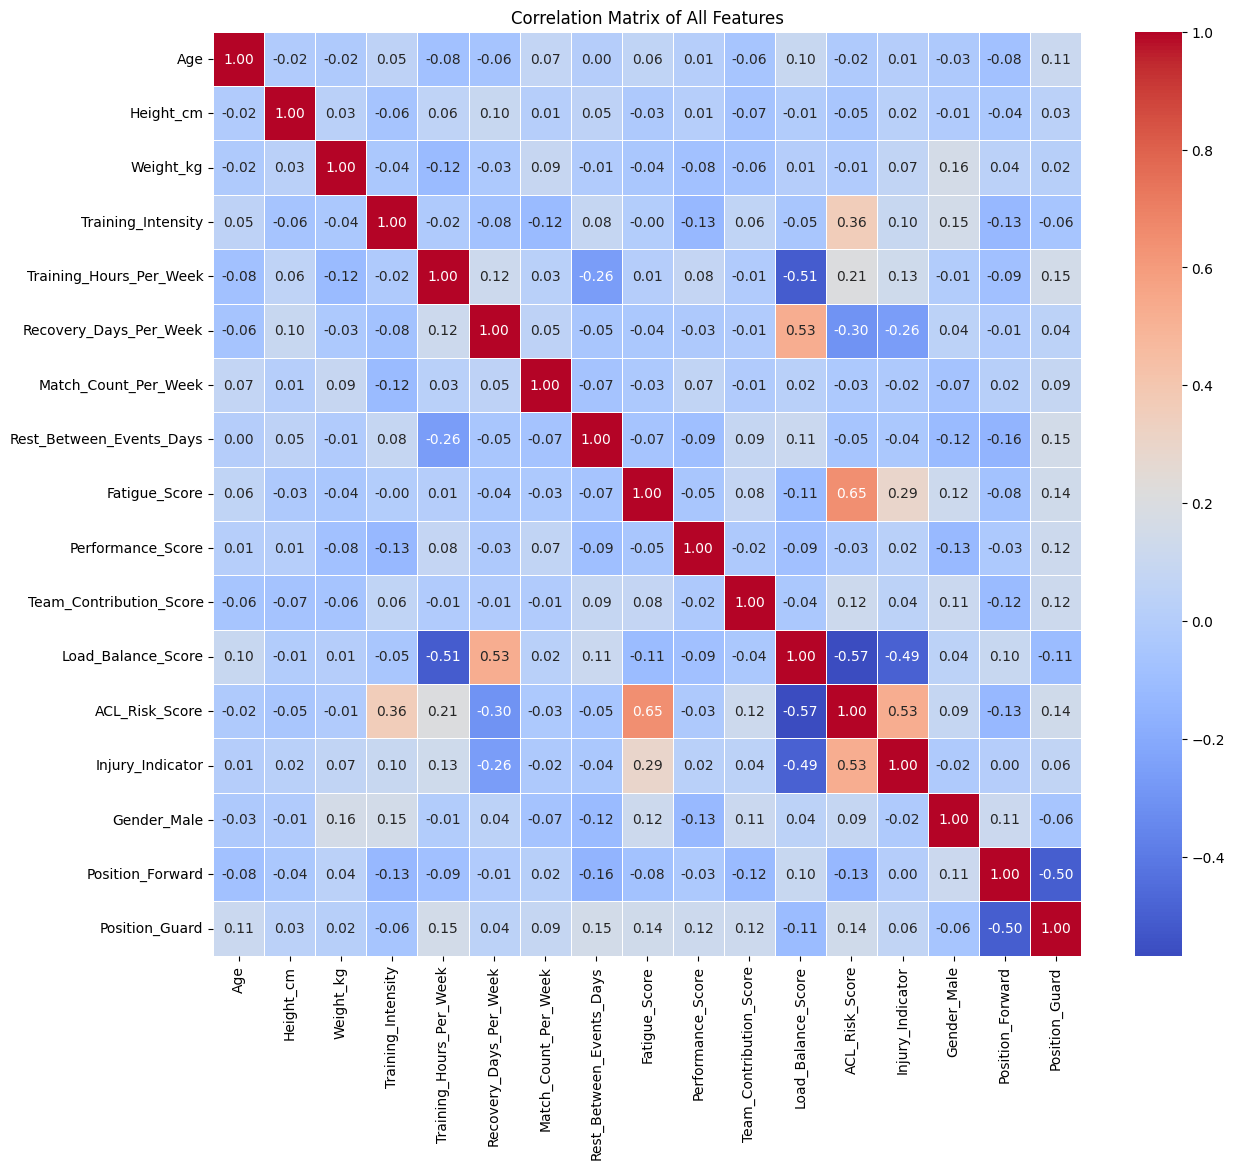

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

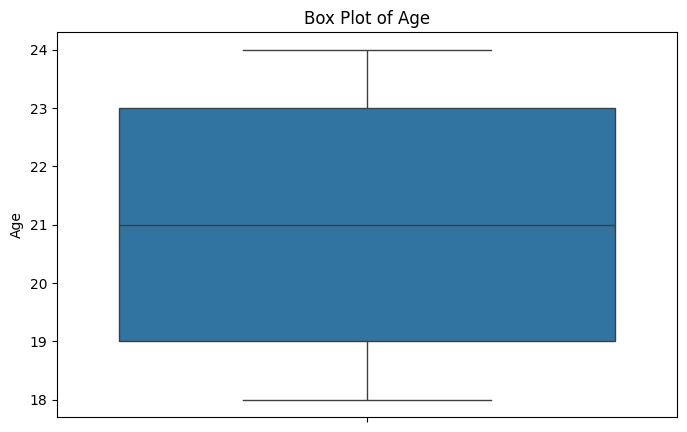

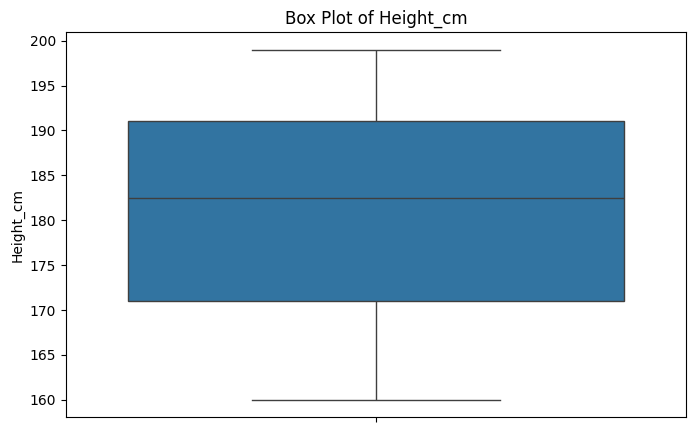

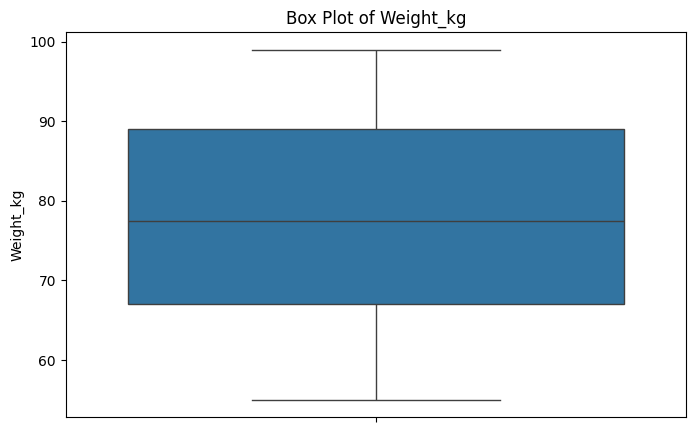

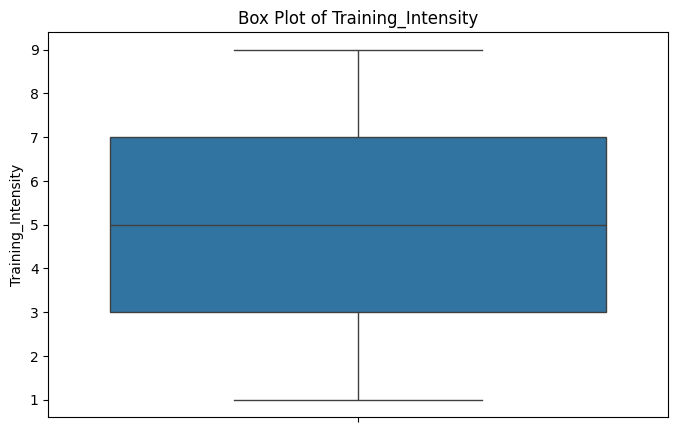

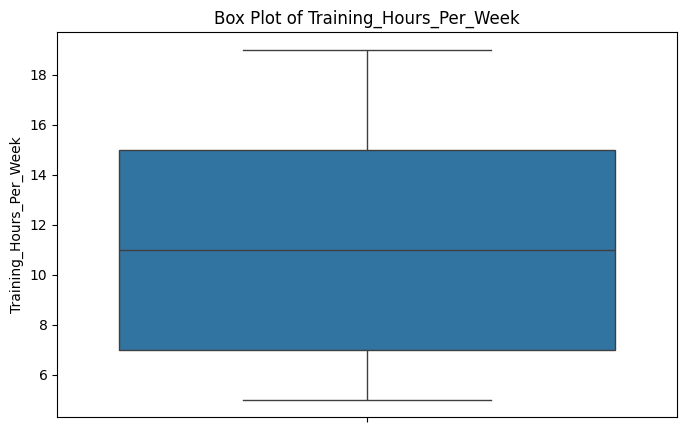

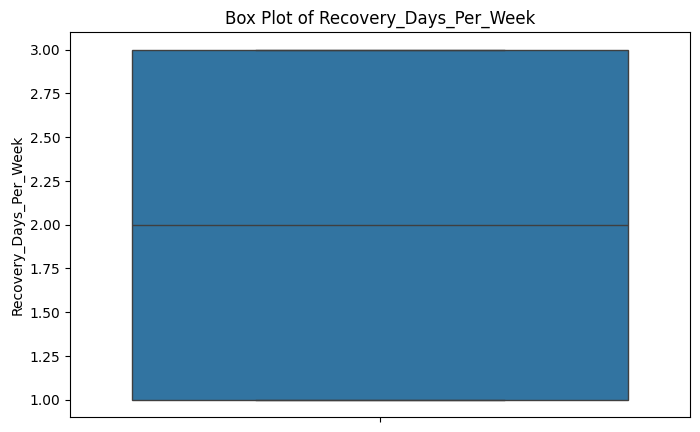

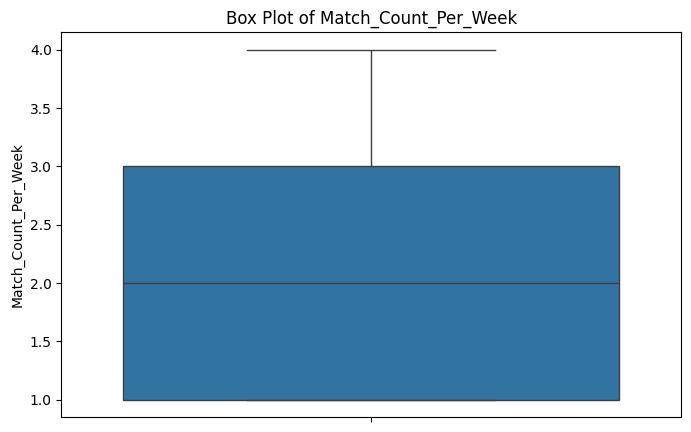

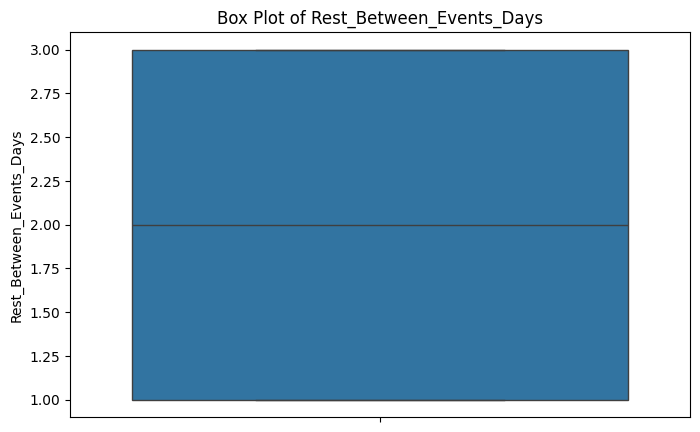

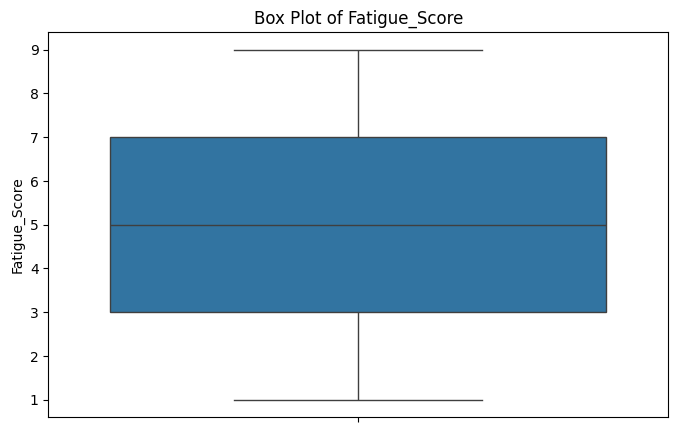

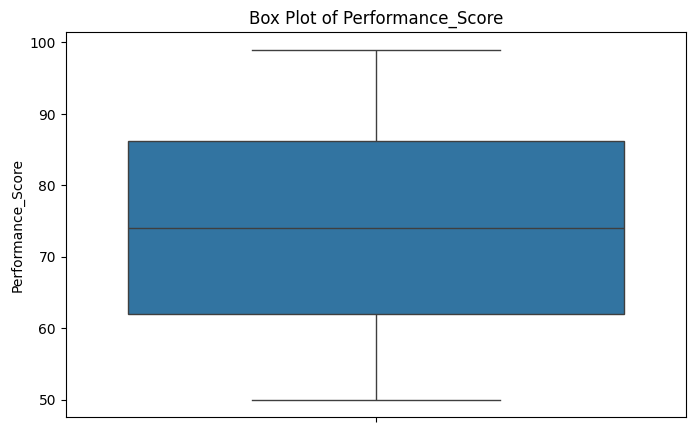

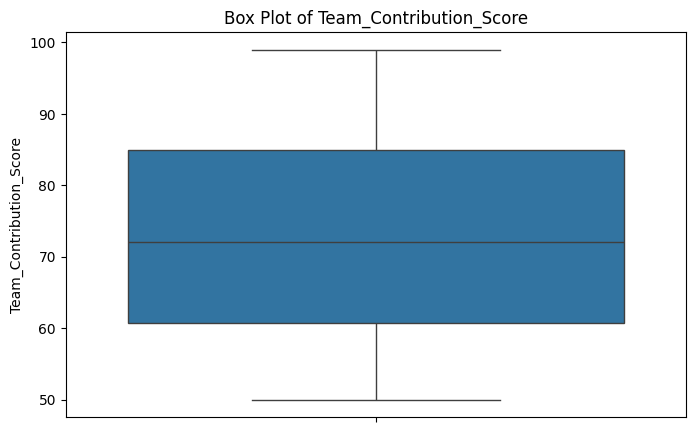

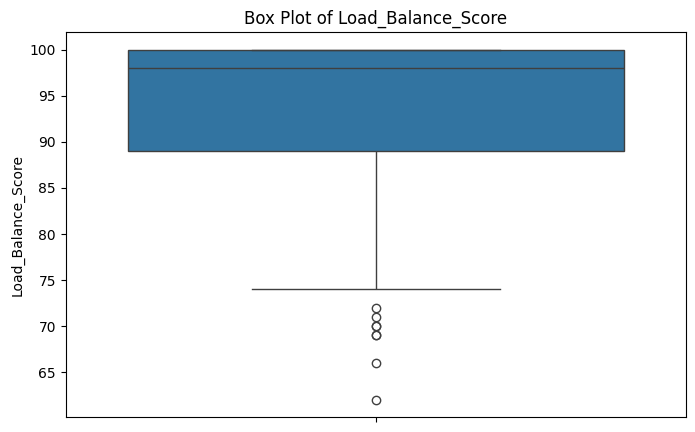

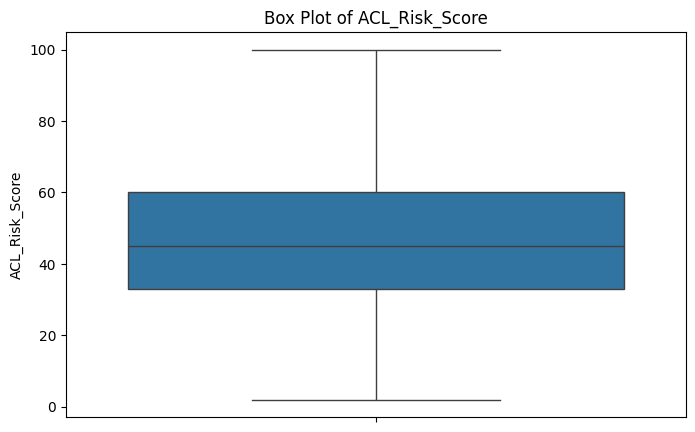

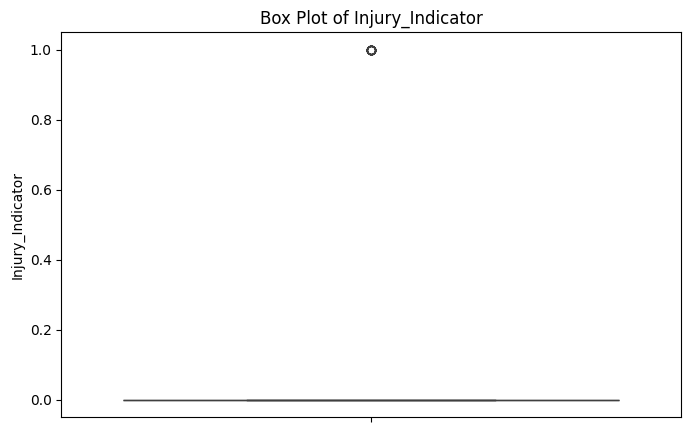

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

## build the predictive model

### predicting Athlete ACL risk

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

X = data.drop(columns=['Injury_Indicator'])
y = data['Injury_Indicator']


In [ ]:
X.head()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Gender_Male,Position_Forward,Position_Guard
0,24,195,99,2,13,2,3,1,1,99,58,100,4,False,False,False
1,21,192,65,8,14,1,3,1,4,55,63,83,73,True,True,False
2,22,163,83,8,8,2,1,3,6,58,62,100,62,True,False,True
3,24,192,90,1,13,1,1,1,7,82,74,78,51,False,False,True
4,20,173,79,3,9,1,2,1,2,90,51,83,49,False,False,False


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original dataset shape:", Counter(y))
print("Training set shape before SMOTE:", Counter(y_train))
print("Testing set shape:", Counter(y_test))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nTraining set shape after SMOTE:", Counter(y_train_resampled))


Original dataset shape: Counter({0: 186, 1: 14})
Training set shape before SMOTE: Counter({0: 149, 1: 11})
Testing set shape: Counter({0: 37, 1: 3})

Training set shape after SMOTE: Counter({0: 149, 1: 149})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the resampled training data
print("Training the Random Forest model...")
model.fit(X_train_resampled, y_train_resampled)
print("Training complete!")

# Make predictions on the unseen test data
y_pred = model.predict(X_test_scaled)

Training the Random Forest model...
Training complete!


In [ ]:
# Print the accuracy score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.67      0.67      0.67         3

    accuracy                           0.95        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.95      0.95      0.95        40


Confusion Matrix:
[[36  1]
 [ 1  2]]


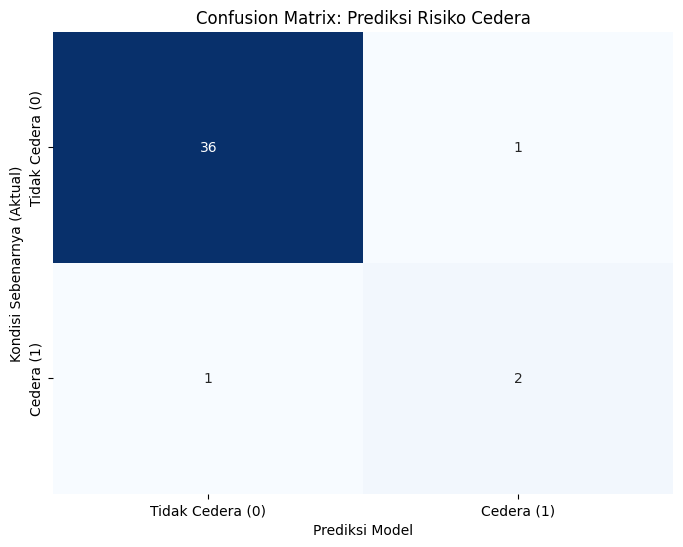

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Tidak Cedera (0)', 'Cedera (1)'],
            yticklabels=['Tidak Cedera (0)', 'Cedera (1)'])

plt.xlabel('Prediksi Model')
plt.ylabel('Kondisi Sebenarnya (Aktual)')
plt.title('Confusion Matrix: Prediksi Risiko Cedera')
plt.show()

In [ ]:
# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importances.head(10))


Top 10 Most Important Features:
                    feature  importance
12           ACL_Risk_Score    0.414182
11       Load_Balance_Score    0.211850
5    Recovery_Days_Per_Week    0.122733
8             Fatigue_Score    0.061163
2                 Weight_kg    0.031573
15           Position_Guard    0.025761
10  Team_Contribution_Score    0.021922
3        Training_Intensity    0.021799
1                 Height_cm    0.021271
4   Training_Hours_Per_Week    0.020654
